In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
  
# metadata 
print(credit_approval.metadata) 
  
# informações sobre as variáveis
print(credit_approval.variables) 


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

# Analisar dados ausentes

In [2]:
# Identificar dados ausentes que não foram identificados como vazio
X.replace({"?": np.nan, "-": np.nan, " ": np.nan})

print(X.isna().sum()) 

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
dtype: int64


In [3]:
X.info()
X.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.0+ KB


A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
dtype: int64

# Escolher tipo de tratamento para os dados ausentes

#### Irei analisar a distribuição das variáveis e outliers para dados numéricos

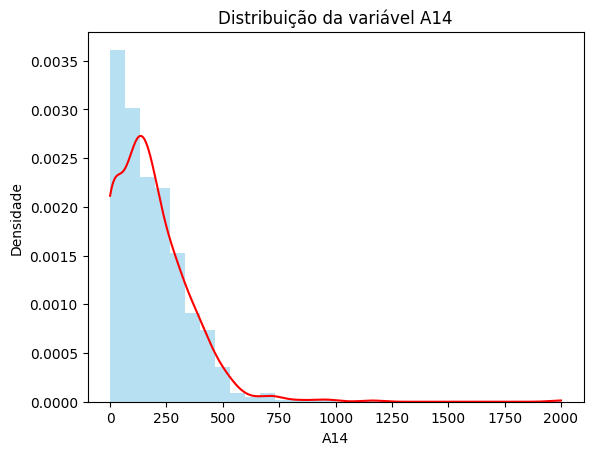

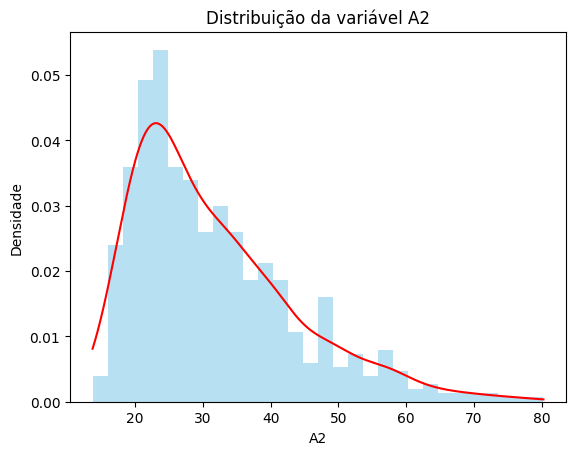

Skewness de A14: 2.72
Skewness de A2: 1.15


In [4]:
for var in ['A14', 'A2']:
    dados = X[var].dropna()
    
    # Histograma
    plt.hist(dados, bins=30, alpha=0.6, color='skyblue', density=True)
    
    # KDE manual com scipy
    kde = gaussian_kde(dados)
    x_vals = np.linspace(dados.min(), dados.max(), 1000)
    plt.plot(x_vals, kde(x_vals), color='red')
    
    plt.title(f'Distribuição da variável {var}')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.show()

print(f"Skewness de A14: {X['A14'].skew():.2f}")
print(f"Skewness de A2: {X['A2'].skew():.2f}")

In [5]:
outliers_por_variavel = {}

for var in ['A14', 'A2']:
    dados = X[var].dropna()

    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]
    quantidade = outliers.shape[0]
    
    outliers_por_variavel[var] = quantidade

    print(f'{var}: {quantidade} outliers')

    percentual = (quantidade / len(dados)) * 100
    print(f'{var}: {quantidade} outliers ({percentual:.2f}%)')



A14: 13 outliers
A14: 13 outliers (1.92%)
A2: 16 outliers
A2: 16 outliers (2.36%)


# Preencher dados ausentes das variáveis numéricas pela mediana, devido a assimetria e outliers

In [6]:
X.loc[:, 'A14'] = X['A14'].fillna(X['A14'].median())
X.loc[:, 'A2'] = X['A2'].fillna(X['A2'].median())

# Preencher dados nulos de variáveis categóricas com os mais frequentes

In [7]:
for var in ['A1', 'A4', 'A5', 'A6', 'A7']:
    frequencia = X[var].mode()[0]
    print(frequencia)
    X.loc[:, var] = X[var].fillna(frequencia)

b
u
g
c
v


In [ ]:
X.isnull().sum() # verificação dos dados ausentes após o preenchimento

A15    0
A14    0
A13    0
A12    0
A11    0
A10    0
A9     0
A8     0
A7     0
A6     0
A5     0
A4     0
A3     0
A2     0
A1     0
dtype: int64